In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [2]:
!gdown --id 1dO6gwoYA6OyhOTlgh2u3TvD8Hb3kUX1F
#Link to download dataset https://archive.ics.uci.edu/ml/datasets/iris

Downloading...
From: https://drive.google.com/uc?id=1dO6gwoYA6OyhOTlgh2u3TvD8Hb3kUX1F
To: d:\Freshy_KMUTT_PCCMS\HDS-YEAR-3\HON001 Data visualization\full_data.csv

  0%|          | 0.00/7.22M [00:00<?, ?B/s]
  7%|▋         | 524k/7.22M [00:00<00:07, 948kB/s]
 15%|█▍        | 1.05M/7.22M [00:00<00:05, 1.13MB/s]
 22%|██▏       | 1.57M/7.22M [00:01<00:04, 1.34MB/s]
 29%|██▉       | 2.10M/7.22M [00:01<00:03, 1.46MB/s]
 36%|███▋      | 2.62M/7.22M [00:01<00:02, 1.61MB/s]
 44%|████▎     | 3.15M/7.22M [00:02<00:02, 1.86MB/s]
 51%|█████     | 3.67M/7.22M [00:02<00:01, 2.04MB/s]
 58%|█████▊    | 4.19M/7.22M [00:02<00:01, 2.37MB/s]
 65%|██████▌   | 4.72M/7.22M [00:02<00:01, 2.23MB/s]
 73%|███████▎  | 5.24M/7.22M [00:02<00:00, 2.29MB/s]
 80%|███████▉  | 5.77M/7.22M [00:03<00:00, 2.37MB/s]
 87%|████████▋ | 6.29M/7.22M [00:03<00:00, 2.50MB/s]
 94%|█████████▍| 6.82M/7.22M [00:03<00:00, 2.47MB/s]
100%|██████████| 7.22M/7.22M [00:04<00:00, 1.40MB/s]
100%|██████████| 7.22M/7.22M [00:04<00:00, 1.75MB/s]

In [3]:
dataset = pd.read_csv('full_data.csv')
dataset.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [4]:
null_check = dataset.isnull()
null_check.sum()


Unnamed: 0       0
year             0
month            0
intent           1
police           0
sex              0
age             18
race             0
hispanic         0
place         1384
education     1422
dtype: int64

In [5]:
dataset2 = dataset.dropna()


In [6]:
null_check = dataset2.isnull()
null_check.sum()


Unnamed: 0    0
year          0
month         0
intent        0
police        0
sex           0
age           0
race          0
hispanic      0
place         0
education     0
dtype: int64

In [7]:
dataset2['intent'].unique()

array(['Suicide', 'Undetermined', 'Accidental', 'Homicide'], dtype=object)

In [35]:
dataset3 = dataset2.groupby("sex").count()
df_bysex = dataset3['Unnamed: 0']

Question 1: What is the number of annual suicide gun deaths in the United States from 2012 to 
2014, by gender?

<AxesSubplot:title={'center':'Death per year \n 1999-2015'}, xlabel='sex'>

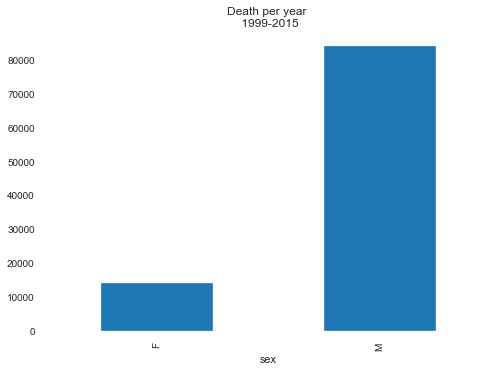

In [36]:
df_bysex.plot.bar(title='Death per year \n 1999-2015')

Q2 : What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?

In [142]:
df_byRace = dataset2['race'].value_counts(ascending=False)*100/100000
df_byRace

White                             64.598
Black                             22.675
Hispanic                           8.603
Asian/Pacific Islander             1.261
Native American/Native Alaskan     0.878
Name: race, dtype: float64

<AxesSubplot:title={'center':'number of gun deaths by race in the United States per 100,000 people \nfrom 2012 to 2014'}>

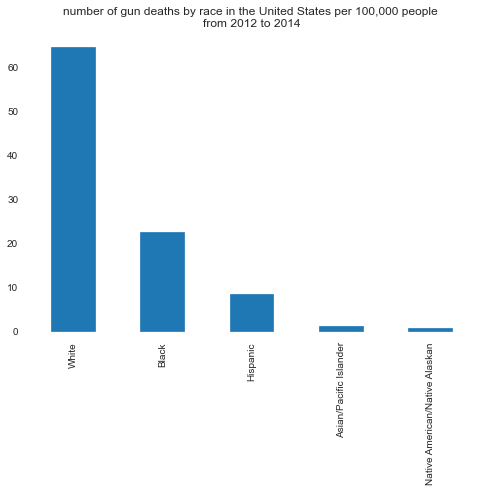

In [143]:
df_byRace.plot.bar(title='number of gun deaths by race in the United States per 100,000 people \nfrom 2012 to 2014')

Q3 : What is the annual number of gun deaths in the United States on average from 2012 to 2014, by cause?

In [106]:
df_bycause = dataset2.groupby(['intent','year']).count()
df_bycause

Unnamed: 0  month  police    sex    age   race  hispanic  \
intent       year                                                             
Accidental   2012         533    533     533    533    533    533       533   
             2013         490    490     490    490    490    490       490   
             2014         575    575     575    575    575    575       575   
Homicide     2012       11467  11467   11467  11467  11467  11467     11467   
             2013       11073  11073   11073  11073  11073  11073     11073   
             2014       10789  10789   10789  10789  10789  10789     10789   
Suicide      2012       20360  20360   20360  20360  20360  20360     20360   
             2013       20892  20892   20892  20892  20892  20892     20892   
             2014       21039  21039   21039  21039  21039  21039     21039   
Undetermined 2012         255    255     255    255    255    255       255   
             2013         275    275     275    275    275    275       275   
             2014         267    267     267    267    267    267       267   

                   place  education  
intent       year                    
Accidental   2012    533        533  
             2013    490        490  
             2014    575        575  
Homicide     2012  11467      11467  
             2013  11073      11073  
             2014  10789      10789  
Suicide      2012  20360      20360  
             2013  20892      20892  
             2014  21039      21039  
Undetermined 2012    255        255  
             2013    275        275  
             2014    267        267

In [169]:
df_bycause = df_bycause.groupby(level='intent').mean().sort_values('Unnamed: 0')
df_bycause

,Unnamed: 0,month,police,sex,age,race,hispanic,place,education
intent,,,,,,,,,
Undetermined,265.666667,265.666667,265.666667,265.666667,265.666667,265.666667,265.666667,265.666667,265.666667
Accidental,532.666667,532.666667,532.666667,532.666667,532.666667,532.666667,532.666667,532.666667,532.666667
Homicide,11109.666667,11109.666667,11109.666667,11109.666667,11109.666667,11109.666667,11109.666667,11109.666667,11109.666667
Suicide,20763.666667,20763.666667,20763.666667,20763.666667,20763.666667,20763.666667,20763.666667,20763.666667,20763.666667


In [170]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(int(i),int(y[i]),int(y[i]))

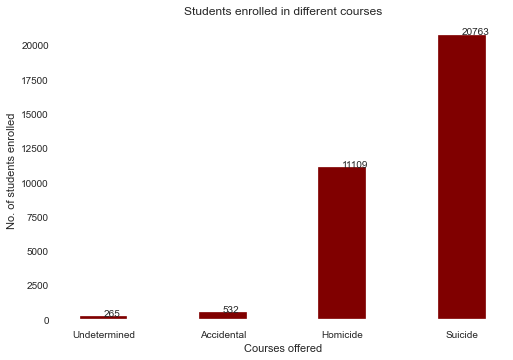

In [171]:
plt.bar(df_bycause.index.values, df_bycause['Unnamed: 0'], color ='maroon',width = 0.4)
addlabels(df_bycause.index.values, df_bycause['Unnamed: 0'])
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

Q4 : What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?

In [144]:
df_byintent = dataset2['intent'].value_counts(ascending=False)*100/100000
df_byintent

Suicide         62.291
Homicide        33.329
Accidental       1.598
Undetermined     0.797
Name: intent, dtype: float64

In [152]:
df_byintent.keys()

Index(['Suicide', 'Homicide', 'Accidental', 'Undetermined'], dtype='object')

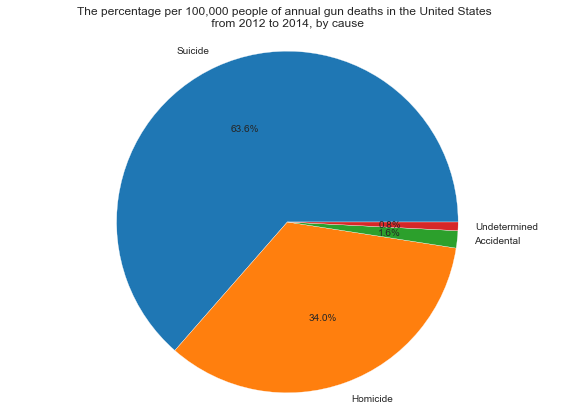

In [161]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_byintent, labels = df_byintent.keys(),autopct='%1.1f%%')
plt.title('The percentage per 100,000 people of annual gun deaths in the United States \n from 2012 to 2014, by cause')
plt.axis('equal')
plt.show()

Q5 : What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year?

In [165]:
df_byyear = dataset2['year'].value_counts(ascending=False)
df_byyear

2013    32730
2014    32670
2012    32615
Name: year, dtype: int64

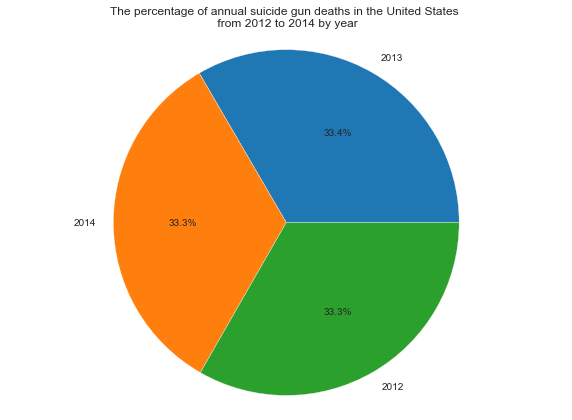

In [166]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_byyear, labels = df_byyear.keys(),autopct='%1.1f%%')
plt.title('The percentage of annual suicide gun deaths in the United States \n from 2012 to 2014 by year')
plt.axis('equal')
plt.show()